<a href="https://colab.research.google.com/github/positmin/positmin/blob/main/05_knn_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20221012 10:30

(1, 5)
1==> [5.1 2.2]
2==> [3.8 3.7]
3==> [3.4 1.9]
4==> [2.9 2.5]
5==> [5.7 3.5]


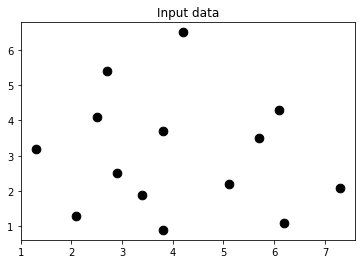

In [ ]:
import numpy as np ## numpy
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors # 비지도학습 -> 근처의 가까운 노드를 찾고 투표하는 과정이 없음
X = np.array([[2.1, 1.3], [1.3, 3.2], [2.9, 2.5], [2.7, 5.4], [3.8, 0.9], 
        [7.3, 2.1], [4.2, 6.5], [3.8, 3.7], [2.5, 4.1], [3.4, 1.9],
        [5.7, 3.5], [6.1, 4.3], [5.1, 2.2], [6.2, 1.1]])
k = 5
test_datapoint = [4.3, 2.7]
plt.figure()
plt.title('Input data')
plt.scatter(X[:,0], X[:,1], marker='o', s=75, color='black')
# KD_tree, 'ball_tree' 구조화된 데이터(일정한 규칙)
# 미리 거리값에 따라 트리를 구성
# 게으른 학습법을 보완하는 트리 구성 10:58
knn_model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X)
# 거리, 색인값을 리턴 : 이것이 트리의 구성물이다. 10:59
distances, indices = knn_model.kneighbors([test_datapoint]) # 검색
print(indices.shape)
for rank, index in enumerate(indices[0][:k], start=1):
  print(str(rank) + "==>", X[index])

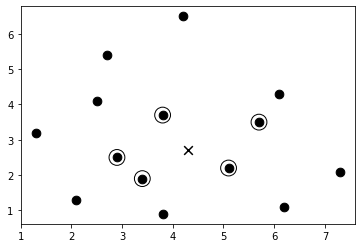

In [ ]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker='o', s=75, color='k')
plt.scatter(X[indices][0][:][:, 0], X[indices][0][:][:,1],
            marker='o', s=250, color='k', facecolors='none')
plt.scatter(test_datapoint[0], test_datapoint[1],
            marker='x', s=75, color='k')
plt.show()

In [ ]:
## https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import neighbors, datasets

input_file = '/content/drive/MyDrive/00_05_1_daejeon/data/data.txt'
data = np.loadtxt(input_file, delimiter=',') # text 파일로딩시 loadtxt -> ndarry
X, y = data[:, :-1], data[:, -1].astype(np.int)
print(X.shape) # 300, 2

(300, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


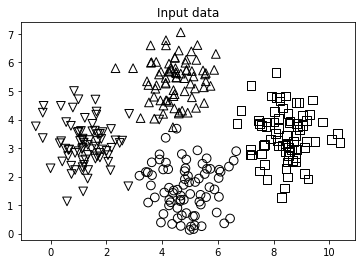

In [ ]:
plt.figure()
plt.title('Input data')
marker_shapes = 'v^os' # s는 square
mapper = [marker_shapes[i] for i in y] # class가 4개 
for i in range(X.shape[0]): # 300
  plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
              s = 75, edgecolors='black', facecolors='none') # s: size

In [ ]:
num_neighbors = 12
# uniform(균등), distance(가까이 있는 데이터는 더 큰 가중치, 멀리 있으면 1표, 가까이 있으면 1.2표 -> 이렇게 가중치를 붙임), step_size = 0.01
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance')
classifier.fit(X, y)

KNeighborsClassifier(n_neighbors=12, weights='distance')

Text(0.5, 1.0, 'model boundaries')

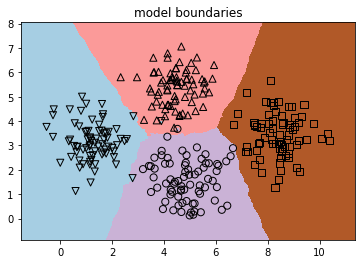

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 한계값보다 더 폭이 넓게 표현
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
step_size = 0.01 ## 이해하기 쉽게 옮김
# np.meshgrid 정점 좌표를 결정 11:31
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), ## 메쉬그리드 하게 되면 np.arange끼리 곱하여 x_value가 만들어짐 11:31
                                 np.arange(y_min, y_max, step_size))
# c_ 데이터를 컬럼으로 합쳐라
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()]) # pandas에서는 row stack
output = output.reshape(x_values.shape)\
# 좌표계값
plt.figure()
# 예측 번호를 컬러번호와 매핑해서 색을 칠함
plt.pcolormesh(x_values, y_values, output, cmap=cm.Paired) # cmap으로 컬러 종류를 결정하고, output으로 컬러 번호를 결정
# 영역을 찍고 위에는 데이터를 표시
for i in range(X.shape[0]):
  plt.scatter(X[i, 0], X[i, 1], marker=mapper[i],
              s = 50, edgecolors='black', facecolors='none')
plt.xlim(x_values.min(), x_values.max())
plt.ylim(y_values.min(), y_values.max())
plt.title('model boundaries')

test_datapoint = [5.1, 3.6] ## 11:35
# 12개의 이웃을 찾는 것
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]

In [ ]:
_, indices = classifier.kneighbors([test_datapoint])
indices = indices.astype(np.int)[0]
indices

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([ 18,  62,  14, 170, 142, 110,  10, 206, 166, 246, 294, 138])

In [ ]:
# 투표를 통해서 결정 ## 11:37
classifier.predict([test_datapoint])[0]

2

# face classification

# 메모리에 있는 이미지의 표현
- 1차원으로 표현
- 2차원 배열 -> 메모리 -> 1차원
- 3차원

In [ ]:
## 특성이 몇개에요? 11:46
(87 * 65) # 5655
# 데이터 포인트는 변수 수만큼 특징
#                   변수(kor, mat)
# data point            10    20
# ***********************************

5655

(87, 65)


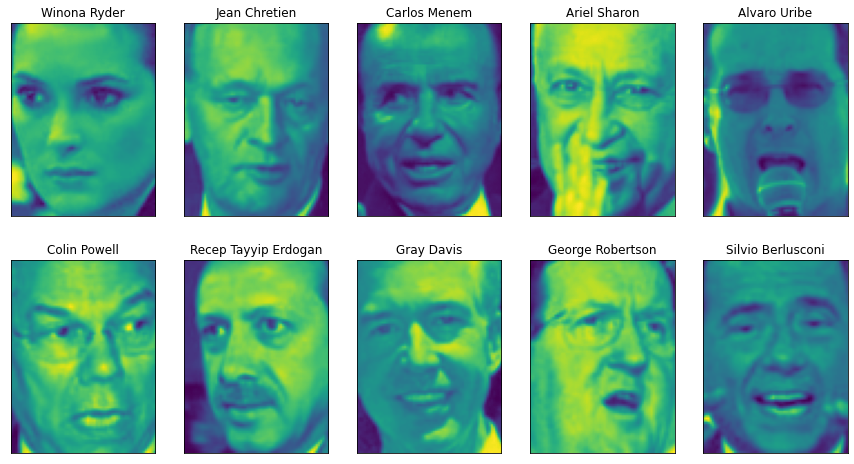

In [ ]:
## 11:43
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(image_shape) # (87, 65)
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [ ]:
from sklearn.decomposition import PCA
people.target[0:10], people.target_names[people.target[0:10]]
# 3023장의 이미지
print("people.images.shape: {}".format(people.images.shape)) ## (3023, 87, 65)
# 사람 수가 : 62명
print("클래스 개수: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
클래스 개수: 62


In [ ]:
## 11:53
# 사람 62명에 대하여 3023장의 이미지가 있음
# 0 ~ 61
## 학습을 위해서 여러장을 찍었으니까  target 3023장 중에서 카운트
counts = np.bincount(people.target) # 62명에 대한 이미지 개수가 카운트 
for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25}{1:3}".format(name, count), end=' ')
  if (i + 1) % 3 == 0:
    print()

Alejandro Toledo          39 Alvaro Uribe              35 Amelie Mauresmo           21 
Andre Agassi              36 Angelina Jolie            20 Ariel Sharon              77 
Arnold Schwarzenegger     42 Atal Bihari Vajpayee      24 Bill Clinton              29 
Carlos Menem              21 Colin Powell             236 David Beckham             31 
Donald Rumsfeld          121 George Robertson          22 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Gray Davis                26 
Guillermo Coria           30 Hamid Karzai              22 Hans Blix                 39 
Hugo Chavez               71 Igor Ivanov               20 Jack Straw                28 
Jacques Chirac            52 Jean Chretien             55 Jennifer Aniston          21 
Jennifer Capriati         42 Jennifer Lopez            21 Jeremy Greenstock         24 
Jiang Zemin               20 John Ashcroft             53 John Negroponte           31 
Jose Maria Aznar          23 Jua

In [ ]:
# 학습을 하기 위해서 50장까지 장수를 통일 시키는 구간
# 이미지 : 3023장
# 00000000000000000000
## 3023장이 zeros로 만들어졌고
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target): # 62개에 대하여
  mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask] # 50장까지만 데이터 통일되게 남음
y_people = people.target[mask]
# 정수형 이미지, 부동소수점 이미지 (정규화)
X_people = X_people / 255. # 이미지는 컬러 0~255까지 표현 ( 0 ~ 1 사이의 부동소수점 이미지로 변환 )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
## 12:09
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수: {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수: 0.23


In [ ]:
X_train.shape # 5655 ## 1547장, 장수가 줄었죠? 원래는 3023장이었죠?
## 왜 장수가 다르지? X_people과 X_train은 다름
# 3023 -> 1547

(1547, 5655)

In [ ]:
# 차원축소 -> 특징추출

In [ ]:
## 12:22
# 복잡하면 -> 과적합 -> 차원축소 -> 단순화 -> 모델 일반화
# 주성분을 100개로 
# 결과 (1547장이 100개로 표현) 1547 * 100
# 12:28 whiten : 성분별로 분산이 통일되도록 scaling 하겠다라는 뜻이다.
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
# 5655개의 변수에 대하여 상관계수를 구하고 -> 고유값 분해 -> 고유치 + 고유벡터(5655 * 5655)
# 고유벡터 중에서 100개로 제한하니까 5655 * 100
# (1547, 5655) (5655 , 100) => (1547 x 100)
# 5655 x 100 이라는 정직교하는 축을 학습한다.
X_train_pca = pca.transform(X_train) # 데이터의 열을 100개로 제한
X_test_pca = pca.transform(X_test)

print("훈련차원: {}".format(X_train_pca.shape))
## 1547? 왜 장수가 다르지? X_people과 X_train은 다름

훈련차원: (1547, 100)


In [ ]:
## 12:22
# 주성분으로 표현된 이미지로 분류
# 정확도가 0.08정도 상승
# 8% 상승하였다
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도 {:.2f}".format(knn.score(X_test_pca, y_test))) ## 8% 상승, pca를 했다는 이유로
## https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

테스트 세트 정확도 0.31


# 원래의 이미지로 복원

In [ ]:
## 12:39
# 원래 이미지
# 100 * 5655
print("주성분과 특성 shape: {}".format(pca.components_.shape))

주성분과 특성 shape: (100, 5655)


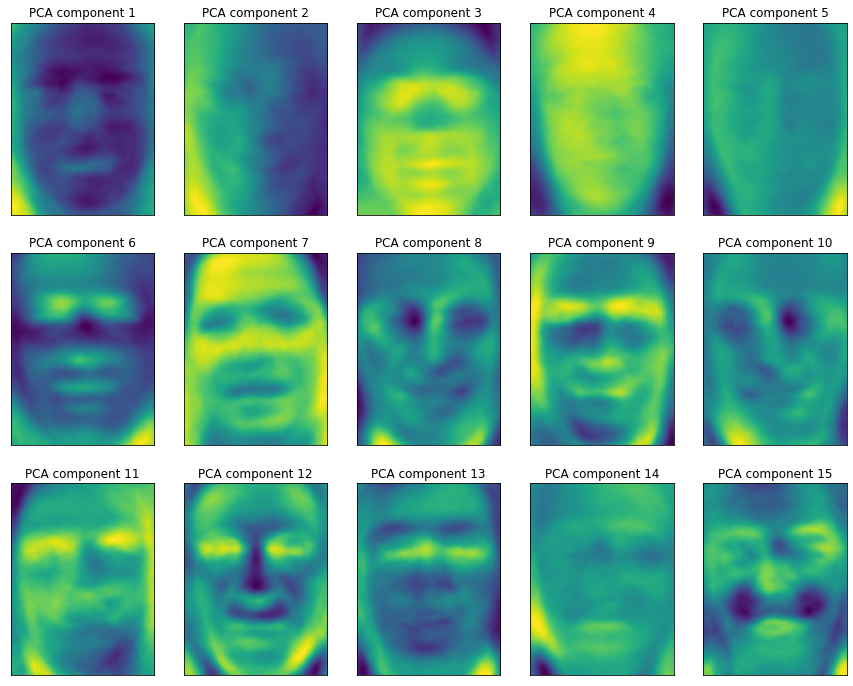

In [ ]:
## 12:39
# 0 ~ 99번까지 데이터에 대하여 15장만
# 100개의 정직교하는 축을 생성 ( 각 축은 사람이 시각으로 이해할 수 없는 특징을 추출한다)
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks':(), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape), cmap='viridis')
  ax.set_title("PCA component {}".format((i + 1)))

(516, 10)
(516, 50)
(516, 100)
(516, 500)


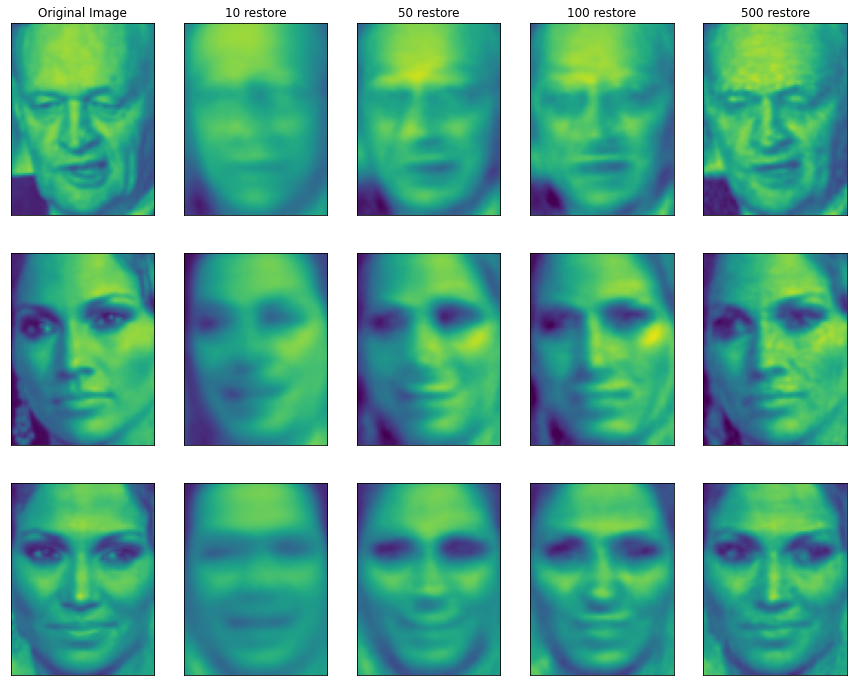

In [ ]:
## 12:47
# 이미지 한장의 사이즈는 5655
# 주성분 축으로 나타내면 5655 x 5655 # 하나의 주성분은 모든 성분이 참여해서 만들어냄
# 주성분으로 표현하면 10 x 5655, 50 x 5655, 100 x 5655, 500 x 5655
## 이렇게 4번 분석하겠다는 뜻이다 ## for n_components
reduced_images = []
for n_components in [10, 50, 100, 500]:
  pca = PCA(n_components=n_components)
  pca.fit(X_train)
  # 원래 사이즈 516 x 5655
  X_test_pca = pca.transform(X_test) # 516장 x 10, 516장이 50개로 표현되겠죠? 516 x 100, 516 x 500
  print(X_test_pca.shape) # (516, 10)(516, 50)(516, 100)(516, 500)
  X_test_back = pca.inverse_transform(X_test_pca) # (516x10)(10x5655)=>516x5655
  # 5655개의 성분을 500개로 줄여서 표현해도 원래의 이미지가 복원이 된다. 이렇게 얘기할 수 있죠?
  reduced_images.append(X_test_back)
fix, axes = plt.subplots(3, 5, figsize = (15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, ax in enumerate(axes):
  ax[0].imshow(X_test[i].reshape(image_shape), vmin=0, vmax=1)
  for a, X_test_back in zip(ax[1:], reduced_images):
    a.imshow(X_test_back[i].reshape(image_shape), vmin=0, vmax=1)
axes[0, 0].set_title("Original Image") ## 원래 이미지 ## 한글이 깨짐
for ax, n_components in zip(axes[0, 1:], [10, 50, 100, 500]):
  ax.set_title("%d restore" % n_components) ## %d 개 주성분으로 복원
  ## 12:56 100개를 했더니 어느정도 비슷

In [ ]:
## 14:00
# clustering

In [ ]:
# 문제
# (20, 30, 90)
# (80, 44, 40)
# - 두 벡터의 거리값을 구하시오
# - 두 벡터의 내적을 구하시오
# - 두 벡터의 방향값을 각각 구하시오

In [ ]:
# - 두 벡터의 거리값을 구하시오
np.sqrt((20 - 80) ** 2 + (30 - 44) ** 2 + (90 - 40) ** 2)

79.3473376995095

In [ ]:
# - 두 벡터의 내적을 구하시오
dist = np.sqrt(20 ** 2 + 30 ** 2 + 90 ** 2)
[20, 30, 90] / dist

array([0.20628425, 0.30942637, 0.92827912])

In [ ]:
dist2 = np.sqrt(80 ** 2 + 44 ** 2 + 40 ** 2)
[80, 44, 40] / dist2

array([0.80257235, 0.44141479, 0.40128618])

In [ ]:
dot_val = 20 * 80 + 30 * 44 + 90 * 40
dot_val

6520

In [ ]:
# 내적값을 각도로 변환하시오
costheta = dot_val / (dist * dist2)
costheta

0.6746489946443097

In [ ]:
theta = np.arccos(costheta)
theta ## 0.8303072556381692 ## 83도

0.8303072556381692

In [ ]:
import numpy as np
a_64 = np.array([61.22, 71.60, -65.755], dtype = np.float64)
b_64 = np.array([61.22, 71.608, -65.72], dtype = np.float64)

In [ ]:
np.sqrt(np.sum((a_64 - b_64) ** 2))

0.035902646142031334

In [ ]:
# norm이 크기 == 피타고라스 정리
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], dtype = np.float64)
dist_64_np
##  np.linalg.norm은 크기값 14:17

array([0.03590265])

In [ ]:
from sklearn import metrics
# pairwise 대상이 두개
dist_64_sklearn = metrics.pairwise.pairwise_distances([a_64],[b_64], metric="euclidean")# l1, l2, manhattan, cosine ## 방향값으로 표현되어짐
## 함수 하나면 거리값을 다 구할 수 있습니다
dist_64_sklearn

array([[0.03590265]])

In [ ]:
## https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# 응집도 최대화 분리도 최대화
# kmeans의 k, center
# ncluster : elbow = WSS(swithin-cluster sum of square) 중심과의 차의 제곱의 합 - 수평으로 꺼지는 지점
# Agglomerative 변합군집을 통해 시각화 (탐색적 클러스터링)
# DBSCAN은 스스로 k값을 결정
# center : { 'k-means++', 'random'},
# n_init 몇번 중심값을 재설정(초기화)해서 테스트 하겠느냐
# max_iter 몇번이나 재계산하면서 라벨을 결정할 것이냐
## 14:30 # n_init * max_iter만큼 반복하면서 테스트하고 -> 가장 좋은 결과 =>
# inertia_ 응집도 : 중심점과 각 데이터간의 거리값의 합계
# tol : tolerence 공차 - 허용기준보다 작으면 같다고 보는 것이다.
# DBSCAN : epsilon 상수 (두 데이터간의 한계거리값을 의미함)
# 부동소수점을 비교 : 엡실론 상수(기준값) 이하면 같다고 본다 0.05 이하면 같다고 본다
# cluster_centers_
# labels_n
# inertia_ 판단기준
## https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
## 가장 가까운 클로스터 중심점에 있는 거리

In [ ]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = datasets.load_iris()
X = iris.data[:, :2]
y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

array([[5.1875    , 3.6375    ],
       [6.85348837, 3.1       ],
       [5.90980392, 2.73529412],
       [4.76666667, 2.89166667]])

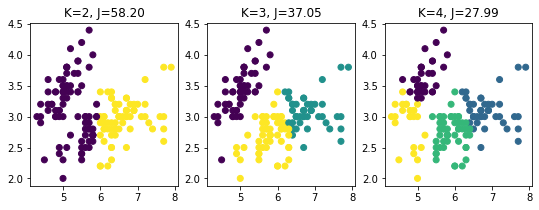

In [ ]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
# 각 cluster의 중심점과 소속 데이터의 거리값의 제곱합
## 14:43 # kmeans에서 군집수가 늘어나면 inertia_는 자동으로 줄어드는 경향이 있다.
plt.title("K=2, J=%.2f" % km2.inertia_)
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_)
km4.cluster_centers_

In [ ]:
km4.cluster_centers_ # 4개의 군집

array([[5.1875    , 3.6375    ],
       [6.85348837, 3.1       ],
       [5.90980392, 2.73529412],
       [4.76666667, 2.89166667]])

In [ ]:
km4.n_iter_ # 중심점 재선택 회수

4

In [ ]:
km3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
km3.inertia_

37.05070212765956

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist # 거리값을 재는 함수
def plot_kmeans(kmeans, X, n_clusters = 4, rseed = 0, ax = None):
  labels = kmeans.fit_predict(X)
  ax = ax or plt.gca()
  ax.axis('equal')
  ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder = 2)
  centers = kmeans.cluster_centers_ # 센터점
  # 반지름을 결정
  radii = [cdist(X[labels == i], [center]).max() # 각 클러스터의 중심값 - 각 요소간의 거리
          for i, center in enumerate(centers)]
  for c, r in zip(centers, radii): # 추가로 이미지 추가할 때 
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', ec="#FF0000", lw = 3, alpha = 0.5, # foreground color, ec: edge color
                            zorder = 1)) # 레이어(투명용지) 순서

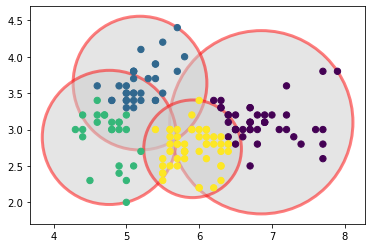

In [ ]:
# 원 : center점, 
# center - kmeans
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

In [ ]:
# 벡터 양자화 (JPG의 압축논리) ## 15:08
# - 이미지 압축
# - 팔레트 : 이미지 -> 중심 컬러값을 구해야 함 (cluster 64개 -> 64개의 중심값)
# - 컬러값으로 표현되는 이미지 -> 중심값 -> 컬러값
# - 모든 이미지에 있는 픽셀은 라벨이 결정됨

In [ ]:
# 불확실하게 분포된 데이터

# 1. cluster_center_
# 2. labels_
# 3. intertia_ 평가할때 씀

In [ ]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
n_colors = 64

china = load_sample_image("china.jpg")
china = np.array(china, dtype=np.float64) / 255 # 이미지 정규화 부동소수점 이미지 ## 15:23
# 컬러 이미지는 3차원
# 3 : RGB
# 이미지 출력 포멧 (가로, 높이, 컬러, 종류)
w, h, d = original_shape = tuple(china.shape) # 427 * 640 이미지 사이즈
print(w, h, d)
# ML에서는 데이터는 반드시 1차원 형태를 가져야 함 ## 15:26
# 행열 형태로 변환해야함
image_array = np.reshape(china, (w * h, d)) # 2차원 데이터로 변환
t0 = time()
# 확률적으로 대표해서 뽑힘 => 복잡성을 줄이기 위해서
image_array_sample = shuffle(image_array, random_state=0)[:1000]
# 비슷한 색이 군집을 이루고 -> 중심값이 대표 결러값이 됨
# 컬러값을 팔레트에 담고 + 라벨 번호를 보내면 이미지 전송 ## 15:28
# JPG 이미지 + 헤더(팔레트 정보) + 이미지 정보에는 팔레트 번호
kmeans = KMeans(n_clusters = n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

427 640 3
done in 1.431s.


# 알고리즘(문제를 해결하는 절차) 구조 => 규칙성
- 문법 -> 다양하게 문제를 해결


In [ ]:
427 * 640 ## 이만큼의 색깔이 있음

273280

# 이미지로 복원하려면
- label 번호를 팔레트의 컬러값으로 변환
- 사이즈를 다시 w, h로 reshape

In [ ]:
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

done in 0.173s.


In [ ]:
# 첫번째 매개변수는 컬러값 팔레트, labels에는 이미지 사이즈만큼의 팔레트 번호
def recreate_image(codebook, labels, w, h): ## label은 이미지 사이즈가 427 * 640이죠?
  d = codebook.shape[1] # 이미지 사이즈 * 라벨 번호 # 64x3, 레이블 사이즈 : (427 * 640, 1)
  # codebook 중심 컬러값
  image = np.zeros((w, h, d))
  label_idx = 0
  for i in range(w): # 427
    for j in range(h): # 640
      image[i][j] = codebook[labels[label_idx]]
      label_idx += 1 # 순서적으로 처리
  return image ## 문장 들여쓰기 주의
## 이 문장(def recreate_image)을 이해하는 것이 관건입니다

In [ ]:
kmeans.cluster_centers_.shape

(64, 3)

In [ ]:
427 * 640

273280

In [ ]:
labels.shape

(273280,)

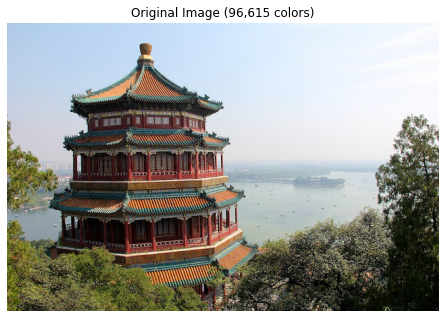

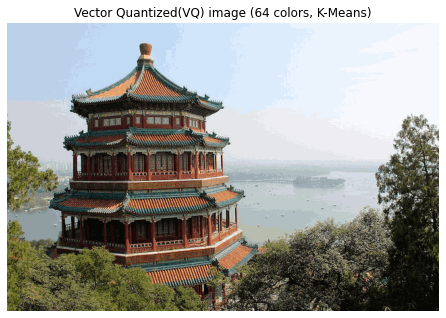

In [ ]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original Image (96,615 colors)')
plt.imshow(china)

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Vector Quantized(VQ) image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

In [ ]:
# 문제 ## 16:10
# - 임의의 이미지를 다운로딩하고 이미지 사이즈를 확인하시오
# - 이미지 정규화
# 16개의 군집화를 진행하고
# 중심값 16개를 확인하고
# 중심값의 shape를 확인하고
# 군집화된 컬러값으로 원래의 이미지를 표현하시오

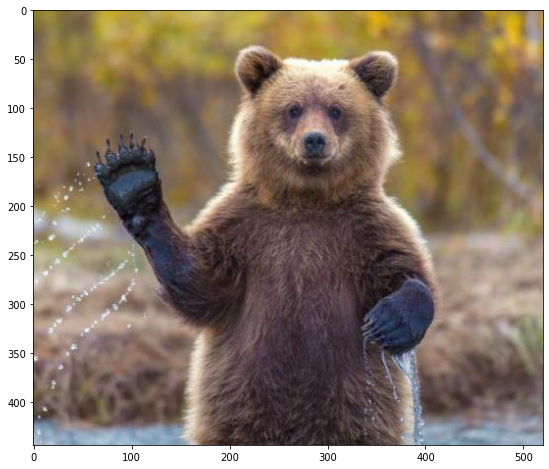

In [ ]:
# - 임의의 이미지를 다운로딩하고 이미지 사이즈를 확인하시오 ## 16:47
import matplotlib.pyplot as plt
from sklearn import cluster
image = plt.imread("/content/drive/MyDrive/00_05_1_daejeon/Images/gom.jpg")
plt.figure(figsize = (15, 8))
plt.imshow(image)

In [ ]:
# - 이미지 정규화
import numpy as np
x, y, z = image.shape
image = np.array(image, dtype=np.float64) / 255
image_2d = image.reshape(x * y, z)
image_2d.shape

(230880, 3)

In [ ]:
# 16개의 군집화를 진행하고
kmeans_cluster = cluster.KMeans(n_clusters=16)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[0.41006942, 0.33237613, 0.29412803],
       [0.74731206, 0.67531436, 0.61002888],
       [0.24452357, 0.18897274, 0.20295657],
       [0.60351271, 0.52912973, 0.46968334],
       [0.81693661, 0.7692067 , 0.72117306],
       [0.53760212, 0.45671085, 0.4031928 ],
       [0.16210892, 0.1224025 , 0.13593575],
       [0.3312824 , 0.25821371, 0.25341278],
       [0.56691217, 0.63386993, 0.70745241],
       [0.62629667, 0.52614248, 0.26356417],
       [0.46517399, 0.38987634, 0.35257238],
       [0.94585234, 0.90996068, 0.83765617],
       [0.73368061, 0.62780394, 0.27436643],
       [0.67677786, 0.59946036, 0.52836473],
       [0.53261704, 0.43641419, 0.28399033],
       [0.21516701, 0.23954091, 0.33772703]])

In [ ]:
kmeans_cluster = cluster.KMeans(n_clusters=16)
kmeans_cluster.fit(image_2d)

KMeans(n_clusters=16)

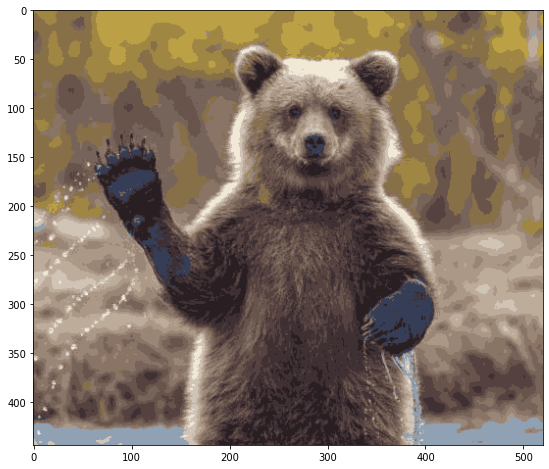

In [ ]:
# 중심값 16개를 확인하고
# 중심값의 shape를 확인하고
# 군집화된 컬러값으로 원래의 이미지를 표현하시오
cluster_labels = kmeans_cluster.labels_
plt.figure(figsize = (15, 8))
plt.imshow(cluster_centers[cluster_labels].reshape(x, y, z))